In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("cars.csv")
df

,VIN,Price,Year,Make,Model Group,Model Detail,Body Style,Color,Damage Description,Odometer,Est. Retail Value,Repair cost,Engine,Drive,Cylinders,Sale Status
0,2V4RW3D19AR295249,1300,2010,VOLKSWAGEN,ROUTAN SE,ROUTAN SE,SPORTS V,WHITE,Front,80311,9671,0,3.8,F,6,Pure
1,1NXBU4EE3AZ342041,2550,2010,TOYOTA,COROLLA BA,COROLLA BA,SEDAN 4D,RED,Side,112976,7570,0,1.8,F,4,Pure
2,JH4CU2F67AC030071,4350,2010,ACURA,TSX,TSX,SEDAN 4D,WHITE,Side,96183,9245,0,2.4,F,4,Pure
3,2HNYD2H63AH516906,4100,2010,ACURA,MDX,MDX TECHNO,4DR SPOR,SILVER,Rear,111533,15747,13272,3.7,All,6,Pure
4,2T1BU4EE2AC457487,900,2010,TOYOTA,COROLLA BA,COROLLA BA,SEDAN 4D,GRAY,Front,232125,5840,0,1.8,F,4,Pure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022,4JGDA5JB0HA955216,22600,2017,MERCEDES-BENZ,GLE 350,GLE 350,4DR SPOR,BLUE,Front,20469,49888,0,3.5,R,6,Minimum
4023,WDDZF4JBXHA175011,24700,2017,MERCEDES-BENZ,E CLASS,E 300,SEDAN 4D,WHITE,ALL OVER,29715,48360,0,2.0,R,4,Minimum
4024,WBA4T9C52H5A14646,15000,2017,BMW,4 SERIES,440I,CONVERTI,GRAY,DAMAGE HISTORY,40240,41260,0,3.0,R,6,Minimum
4025,19UDE2F37HA000813,2550,2017,ACURA,ILX,ILX BASE,SEDAN 4D,WHITE,Front,35663,17530,0,2.4,F,4,Approval


<Axes: >

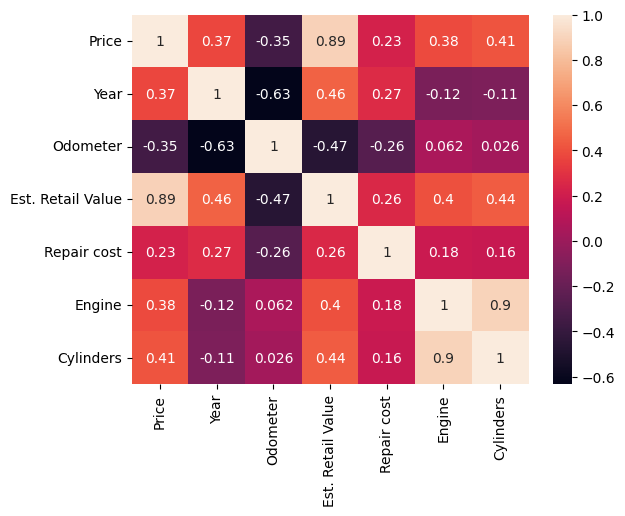

In [3]:
sns.heatmap(df._get_numeric_data().corr(), annot=True)

From the numerical data heatmap we can see that Price has a very strong positive effect on the retail price. Other noteworthy effects are the Year (positive effect), Odometer (negative effect), Engine (positive effect) and Cylinders (positive effect). 

C:\Users\Hovgr\AppData\Local\Temp\ipykernel_17352\2042472447.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


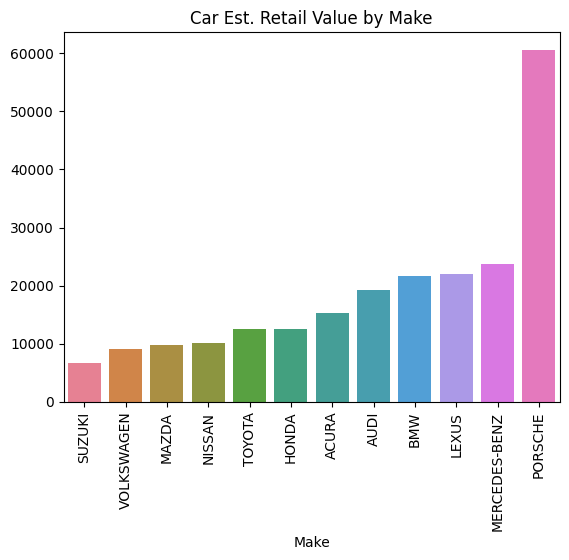

In [4]:
make_group = df.groupby("Make").agg({'Est. Retail Value': 'mean'})
make_group.sort_values(by="Est. Retail Value", inplace=True)
fig, ax = plt.subplots()
sns.barplot(make_group.T, ax=ax)
ax.set_title('Car Est. Retail Value by Make')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

Here we can clearly see that The make of a car affects the estimated retail price.

C:\Users\Hovgr\AppData\Local\Temp\ipykernel_17352\1831041308.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


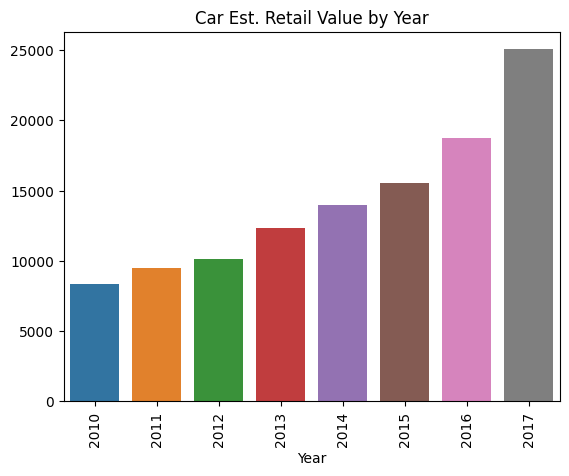

In [24]:
year_group = df.groupby("Year").agg({'Est. Retail Value': 'mean'})
year_group.sort_values(by="Est. Retail Value", inplace=True)
fig, ax = plt.subplots()
sns.barplot(year_group.T, ax=ax)
ax.set_title('Car Est. Retail Value by Year')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

Same with the year; newer models generally tend to be more expensive.

C:\Users\Hovgr\AppData\Local\Temp\ipykernel_17352\3725226740.py:1: FutureWarning: The provided callable <function mean at 0x0000023BAFA94A40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_year_make = pd.pivot_table(df,


<Axes: title={'center': 'Est. Retail Value by Make and Year'}, xlabel='Make'>

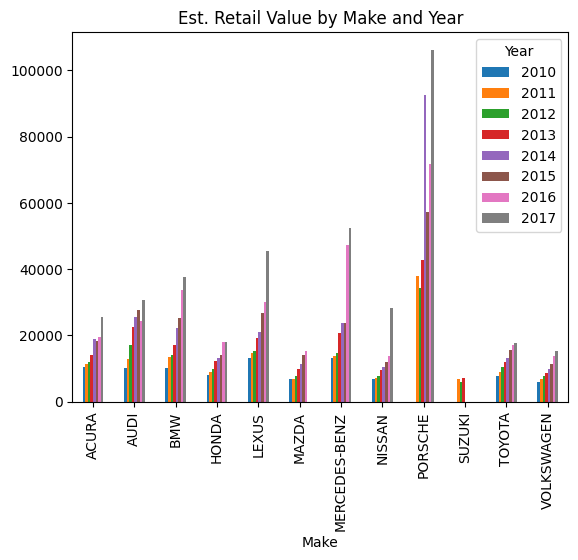

In [25]:
df_year_make = pd.pivot_table(df, 
                          values="Est. Retail Value", 
                          index="Make", 
                          columns="Year", 
                          aggfunc=np.mean)
df_year_make.plot.bar(title='Est. Retail Value by Make and Year')

Same way here we can see that generally under the same make the year increases the price.

C:\Users\Hovgr\AppData\Local\Temp\ipykernel_17352\1358507303.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


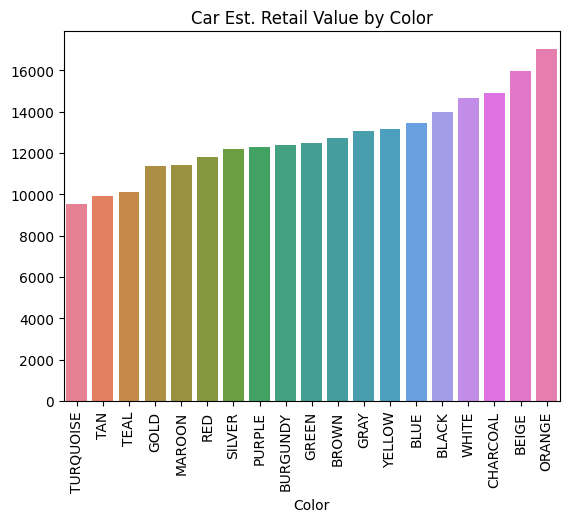

In [26]:
color_group = df.groupby("Color").agg({'Est. Retail Value': 'mean'})
color_group.sort_values(by="Est. Retail Value", inplace=True)
fig, ax = plt.subplots()
sns.barplot(color_group.T, ax=ax)
ax.set_title('Car Est. Retail Value by Color')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

Color seems to have effect at first glance.

C:\Users\Hovgr\AppData\Local\Temp\ipykernel_17352\943417202.py:1: FutureWarning: The provided callable <function mean at 0x0000023BAFA94A40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_color_make = pd.pivot_table(df,


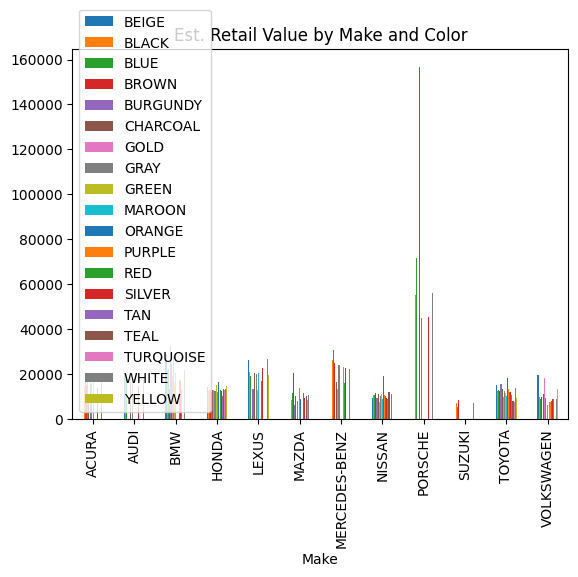

In [27]:
df_color_make = pd.pivot_table(df, 
                          values="Est. Retail Value", 
                          index="Make", 
                          columns="Color", 
                          aggfunc=np.mean)
df_color_make.plot.bar(title='Est. Retail Value by Make and Color')
plt.legend(loc='best')

But, from here we can see that Porsche heavily skew's the data. Not enough time to fully analyze this, but we can make less biased graphs.

C:\Users\Hovgr\AppData\Local\Temp\ipykernel_17352\2914145060.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


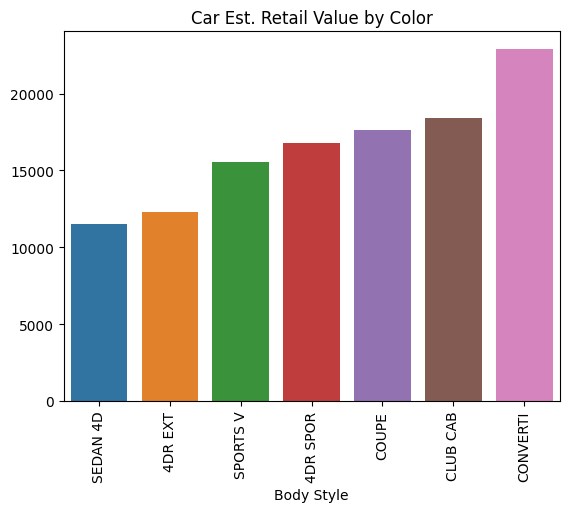

In [12]:
make_group = df.groupby("Body Style").agg({'Est. Retail Value': 'mean'})
make_group.sort_values(by="Est. Retail Value", inplace=True)
fig, ax = plt.subplots()
sns.barplot(make_group.T, ax=ax)
ax.set_title('Car Est. Retail Value by Color')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

Same here it does affect the est. retail price but based on the mark or the year it could also be biased.

C:\Users\Hovgr\AppData\Local\Temp\ipykernel_17352\2988830499.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


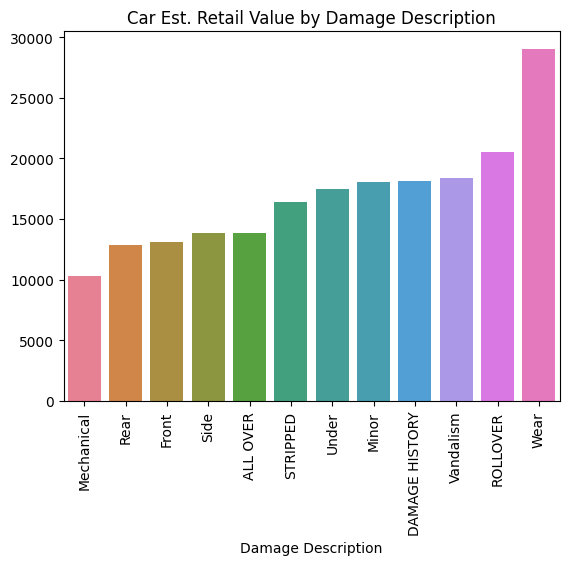

In [37]:
damage_group = df.groupby("Damage Description").agg({'Est. Retail Value': 'mean'})
damage_group.sort_values(by="Est. Retail Value", inplace=True)
fig, ax = plt.subplots()
sns.barplot(damage_group.T, ax=ax)
ax.set_title('Car Est. Retail Value by Damage Description')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

Dame results are intuitive as with more damage the est. value is less.

C:\Users\Hovgr\AppData\Local\Temp\ipykernel_17352\768514622.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


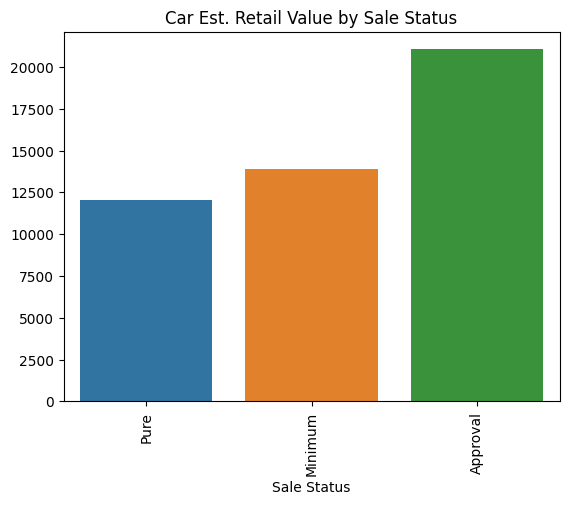

In [39]:
make_group = df.groupby("Sale Status").agg({'Est. Retail Value': 'mean'})
make_group.sort_values(by="Est. Retail Value", inplace=True)
fig, ax = plt.subplots()
sns.barplot(make_group.T, ax=ax)
ax.set_title('Car Est. Retail Value by Sale Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

Here it's clear that the sale status has heavy influence on the  est. value.

C:\Users\Hovgr\AppData\Local\Temp\ipykernel_17352\4027780044.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


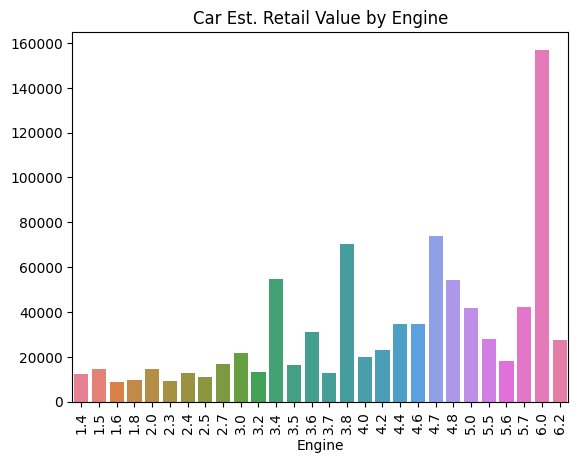

In [40]:
engine_group = df.groupby("Engine").agg({'Est. Retail Value': 'mean'})
engine_group.sort_values(by="Est. Retail Value", inplace=True)
fig, ax = plt.subplots()
sns.barplot(engine_group.T, ax=ax)
ax.set_title('Car Est. Retail Value by Engine')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

Here it looks like there is some trend towards less valued engines being priced less but in the higher numbers there is no clear trend.